<a href="https://colab.research.google.com/github/zakyzuf/PCVK_Ganjil_2023/blob/main/Week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

Import asset & library

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt
import glob
import math

1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


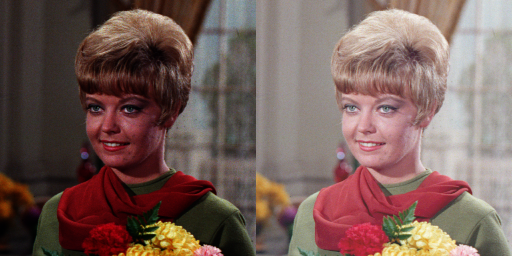

In [7]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

def gammaCorrection(src, gamma):
  invGamma = 1 / gamma
  table = [((i / 255) ** invGamma) * 255 for i in range(256)]
  table = np.array(table, np.uint8)

  return cv.LUT(src, table)

original = cv.imread('/content/drive/MyDrive/female.tiff')
gamma_corrected = gammaCorrection(original, gamma)

# Menampilkan gambar asli dan yang telah dikoreksi
final_frame = cv.hconcat((original, gamma_corrected))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.

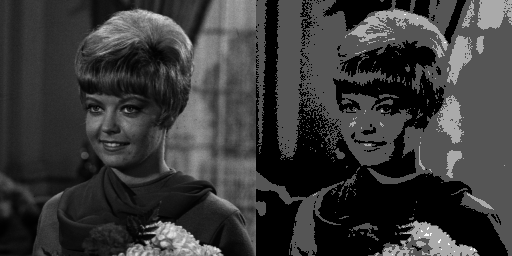

In [10]:
bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg

In [15]:
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

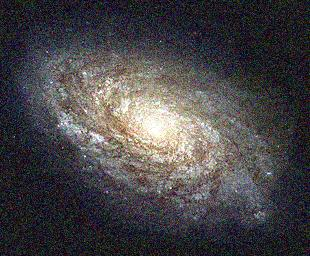

In [16]:
dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

Nilai PSNR untuk noise_number = 5 adalah 27.527714614053597 (dB)


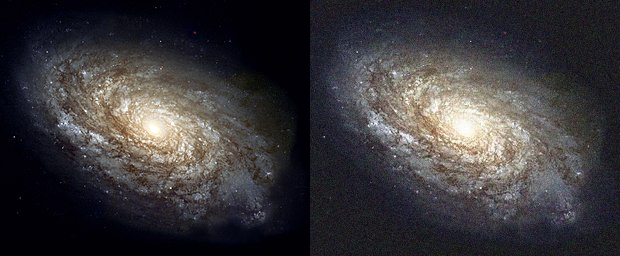

Nilai PSNR untuk noise_number = 10 adalah 27.548615803571153 (dB)


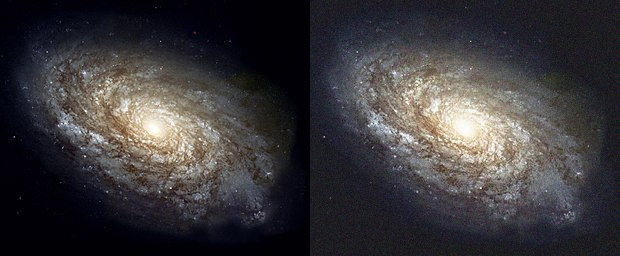

Nilai PSNR untuk noise_number = 20 adalah 27.546805195442357 (dB)


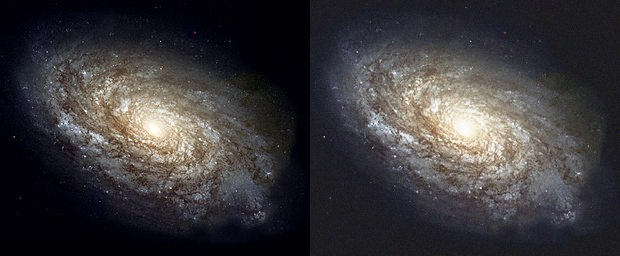

Nilai PSNR untuk noise_number = 40 adalah 27.49267956859125 (dB)


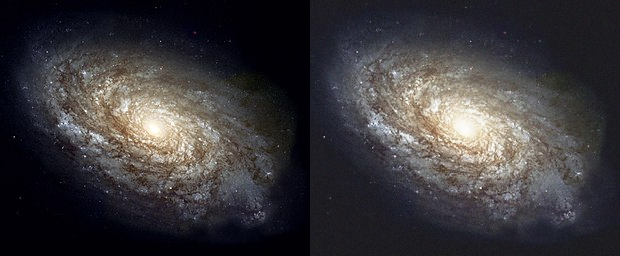

Nilai PSNR untuk noise_number = 80 adalah 27.49755909931174 (dB)


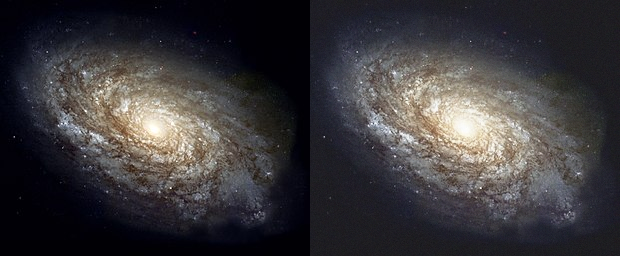

Nilai PSNR untuk noise_number = 100 adalah 27.50105263943059 (dB)


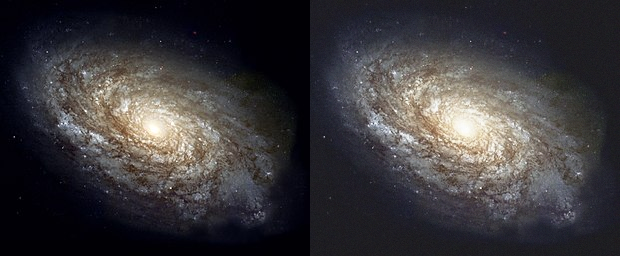

In [46]:
import glob
from math import log10, sqrt
import cv2 as cv
import numpy as np

original = cv.imread('./drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('./drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

noise_numbers = [5, 10, 20, 40, 80, 100]

for noise_number in noise_numbers:
    dst = cv_img[0]
    for i in range(noise_number):
        if i == 0:
            pass
        else:
            alpha = 1.0 / (i + 1)
            beta = 1.0 - alpha
            dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

    compressed = dst
    psnr = PSNR(original, compressed)

    print(f'Nilai PSNR untuk noise_number = {noise_number} adalah {psnr} (dB)')

    galaxy_frame = cv.hconcat((original, dst))
    cv2_imshow(galaxy_frame)
    cv.waitKey(0)

cv.destroyAllWindows()


### Kesimpulan
Berdasarkan data PSNR di atas, ada beberapa hal penting yang bisa kita simpulkan:

1. PSNR Menunjukkan Kestabilan: Sepertinya nilai PSNR cukup stabil ketika tingkat kebisingan (noise_number) berubah dari 5 hingga 100. Nilai PSNR tetap berada di sekitar 27.5 dB. Ini menandakan bahwa kualitas gambar tetap baik dan tidak mengalami perubahan besar meskipun tingkat kebisingan berubah.

2. Kualitas Gambar Bagus pada Tingkat Kebisingan Rendah: Dengan nilai PSNR sekitar 27.5 dB, kita bisa menyimpulkan bahwa gambar memiliki tingkat kebisingan yang rendah. Ini berarti gambar masih terlihat baik dan hampir tidak ada distorsi yang disebabkan oleh kebisingan.

3. Sensitivitas Terhadap Perubahan noise_number: Meskipun perubahan noise_number tidak secara drastis memengaruhi nilai PSNR, kita bisa melihat sedikit fluktuasi dalam PSNR ketika noise_number naik dari 5 hingga 100. Ini mengindikasikan bahwa gambar mungkin sedikit lebih responsif terhadap tingkat kebisingan yang berbeda, terutama pada beberapa nilai noise_number tertentu.

Kesimpulannya, gambar dalam eksperimen ini menunjukkan kualitas yang baik dalam menghadapi kebisingan, dengan nilai PSNR yang tetap stabil dan tingkat kebisingan yang rendah. Namun, kita harus tetap memperhatikan fluktuasi kecil yang terjadi pada beberapa tingkat kebisingan tertentu, terutama jika kita ingin menjaga kualitas gambar pada tingkat kebisingan yang lebih tinggi. <br>

4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya
5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.

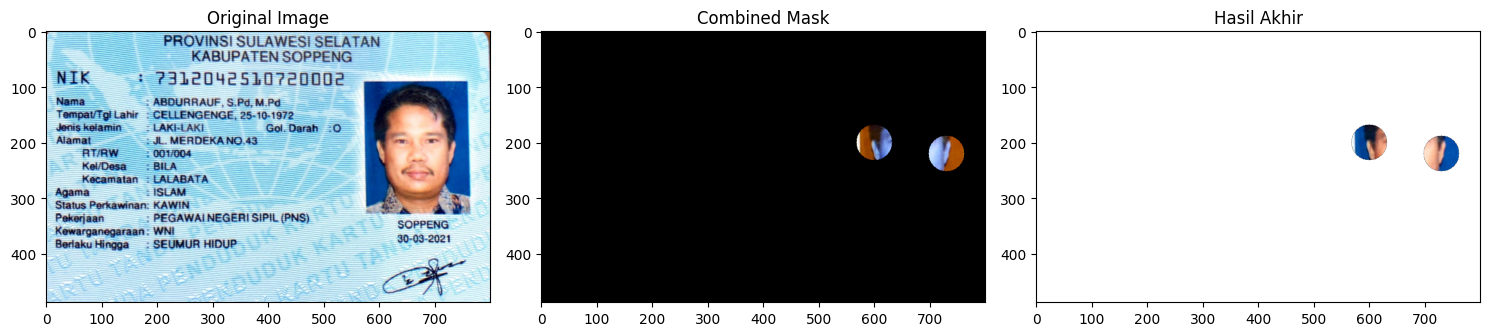

In [58]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_path = ('./drive/MyDrive/PCVK/KTP.jpeg')
img = cv.imread(image_path)

# Membuat masker pertama untuk lingkaran pertama
mask1 = np.zeros(img.shape[:2], dtype="uint8")
cv.circle(mask1, (730, 220), 32, 255, -1)

# Membuat masker kedua untuk lingkaran kedua
mask2 = np.zeros(img.shape[:2], dtype="uint8")
cv.circle(mask2, (600, 200), 32, 255, -1)

# Mengaplikasikan masker pertama pada gambar asli
masked1 = cv.bitwise_and(img, img, mask=mask1)

# Mengaplikasikan masker kedua pada gambar asli
masked2 = cv.bitwise_and(img, img, mask=mask2)

# Menggabungkan kedua masker menggunakan operator "or"
combined_mask = cv.bitwise_or(masked1, masked2)

tmp = cv.cvtColor(combined_mask, cv.COLOR_BGR2GRAY)
_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

b, g, r = cv.split(combined_mask)

rgba = [b, g, r, alpha]

result = cv.merge(rgba)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(132)
plt.imshow(combined_mask, cmap='gray')
plt.title('Combined Mask')
plt.axis('on')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()


NOT

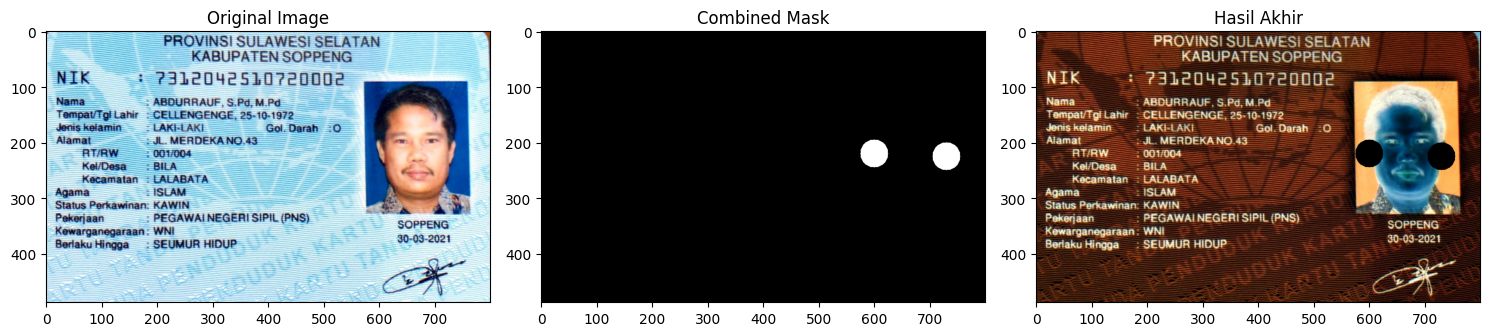

In [64]:
center_1 = (600, 220)
center_2 = (730, 225)
size = 25

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, center_1 , size, (255, 255, 255), -1)
mask = cv.circle(mask, center_2, size, (255, 255, 255), -1)

masked_ktp = ~img & ~mask

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Combined Mask')
plt.axis('on')

plt.subplot(133)
plt.imshow(cv.cvtColor(masked_ktp, cv.COLOR_BGR2RGB))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()

OR

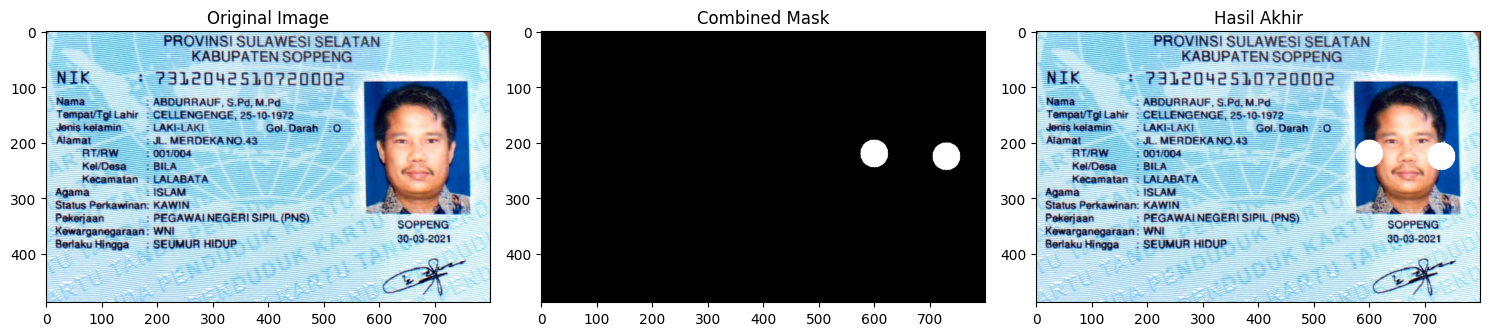

In [65]:
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, center_1 , size, (255, 255, 255), -1)
mask = cv.circle(mask, center_2, size, (255, 255, 255), -1)

masked_ktp = cv.bitwise_or(img, mask)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Combined Mask')
plt.axis('on')

plt.subplot(133)
plt.imshow(cv.cvtColor(masked_ktp, cv.COLOR_BGR2RGB))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()

AND

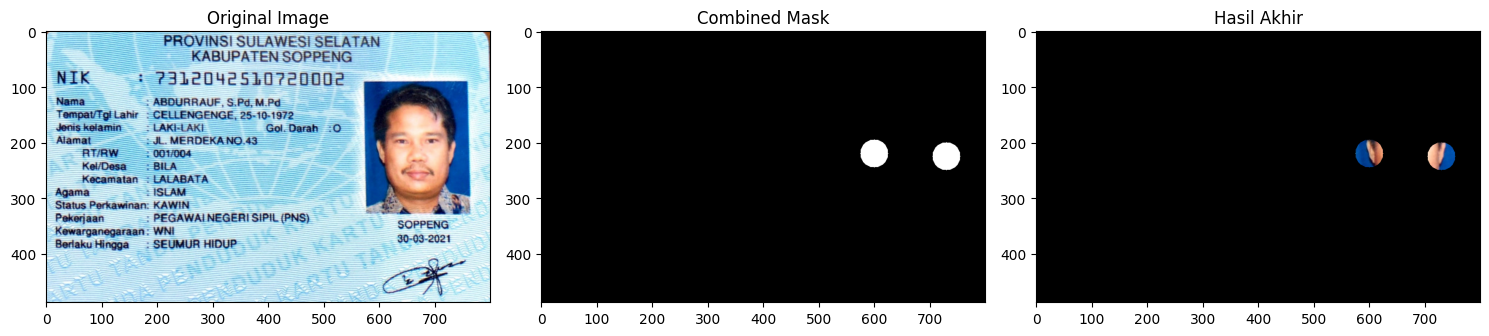

In [66]:
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, center_1 , size, (255, 255, 255), -1)
mask = cv.circle(mask, center_2, size, (255, 255, 255), -1)

masked_ktp = cv.bitwise_and(img, mask)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Combined Mask')
plt.axis('on')

plt.subplot(133)
plt.imshow(cv.cvtColor(masked_ktp, cv.COLOR_BGR2RGB))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()

XOR

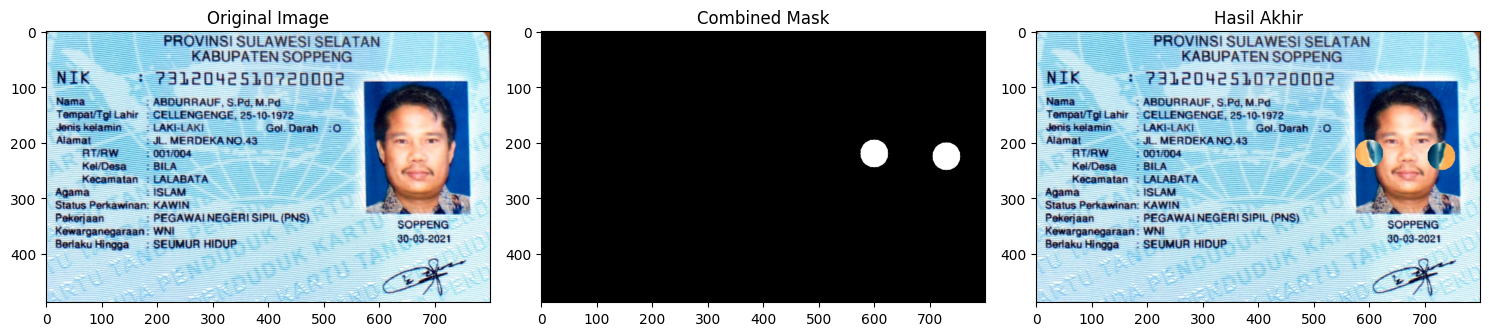

In [67]:
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, center_1 , size, (255, 255, 255), -1)
mask = cv.circle(mask, center_2, size, (255, 255, 255), -1)

masked_ktp = cv.bitwise_xor(img, mask)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Combined Mask')
plt.axis('on')

plt.subplot(133)
plt.imshow(cv.cvtColor(masked_ktp, cv.COLOR_BGR2RGB))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()

### Analisa
* Operator AND: Dalam penggunaan operasi AND, kita menggabungkan dua piksel atau lebih dengan aturan bahwa piksel output hanya akan aktif (dalam warna putih) jika semua piksel input aktif. Penggunaan ini berguna untuk menjaga agar hanya bagian yang tumpang tindih antara dua objek dalam gambar tetap terlihat.

* Operator OR: Dalam operasi OR, kita menggabungkan dua piksel atau lebih dengan aturan bahwa piksel output akan aktif jika salah satu atau lebih dari piksel input aktif. Operator ini digunakan untuk menggabungkan beberapa objek dalam gambar.

* Operator NOT: Operator NOT digunakan untuk mengubah piksel input menjadi kebalikan dari keadaan semula. Piksel yang sebelumnya aktif menjadi non-aktif (berwarna hitam), dan sebaliknya. Ini berguna untuk menciptakan efek negatif pada gambar.

* Operator NAND: Operasi NAND adalah kebalikan dari operasi AND, di mana piksel output hanya akan non-aktif jika semua piksel input aktif. Ini dapat digunakan untuk memisahkan elemen-elemen dalam gambar.

* Operator XOR: Operasi XOR digunakan untuk menghasilkan piksel output yang aktif jika hanya satu dari dua piksel input yang aktif, namun tidak keduanya. Fungsinya adalah untuk menyoroti perbedaan antara dua gambar atau elemen dalam gambar.